### Final Project on Neighborhoods (Crime Rate)
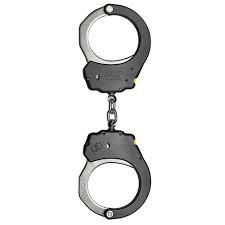

## Introduction
We wanted to identify the best neighborhood regarding crime and will be using data sets involving arrest data, firearm seizure, and populations of neighborhoods.. We will then use the metrics of number of offenses per neighborhood, crime rate per population, and firearm seizures per neighborhood. Therefore our "best" neighborhood will really be the worst in context of crimes.

In [7]:
import pandas as pd


arrest = pd.read_csv("arrest.csv")
seizure = pd.read_csv("seizure.csv")
pop = pd.read_csv("population.csv")

neighborhoods = pd.DataFrame(columns = ["Neighborhood", "Population"])

neighborhoods["Neighborhood"] = pop["Neighborhood"]
neighborhoods["Population"] = pop["Population (2010)"]



    


offenses = pd.DataFrame(columns = ["Offenses"])
offenses["Offenses"] = arrest["INCIDENTNEIGHBORHOOD"]
offenses = offenses["Offenses"].value_counts().sort_values(ascending=False)


neighborhoods




,Neighborhood,Population
0,Allegheny Center,933
1,Allegheny West,462
2,Allentown,2500
3,Arlington,1869
4,Arlington Heights,244
...,...,...
85,Upper Lawrenceville,2669
86,West End,254
87,West Oakland,2604
88,Westwood,3066


# We have the data retrieved from 90 different neighborhoods and their respective populations.

In [4]:
offenses

Central Business District    4276
South Side Flats             3396
Carrick                      2311
East Allegheny               2161
Homewood South               2057
                             ... 
Regent Square                  36
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: Offenses, Length: 98, dtype: int64

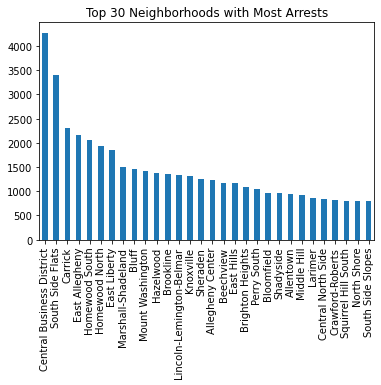

In [7]:
offenses.iloc[:30].plot(kind='bar', x="Neighborhood", y="Crimes", title="Top 30 Neighborhoods with Most Arrests")



Here we have a graph of the top 30 neighborhoods with the most arrests reported. 
We will compare this graph to a graph of population of the same neighborhoods.

In general, Central Busienss District had the most crimes at 4,276 reported. That means that this fulfills our first metric of total arrests, indicating for now that Central Business District is the worst neighborhood.

# However, we can expand on this with possibly more evidence by correlating it with the other data sources to produce a more supported conclusion

In [3]:
neighborhoodpop = pd.DataFrame()
offending = {}

#Here I created seperate lists to store the top 30 neighborhoods we just identified and another list ot store their respective populations.

#To do this, I iterated through the population data set of each neighborhood and comparing each row's neighborhood name to
#the neighborhood name of the current index of the sorted neighborhood list. This got the correct population.
for index, row in arrest.iterrows():
    if row["INCIDENTNEIGHBORHOOD"] in offending:
        offending[row["INCIDENTNEIGHBORHOOD"]] = offending[row["INCIDENTNEIGHBORHOOD"]] + 1
    else:
        offending[row["INCIDENTNEIGHBORHOOD"]] = 1
offending_sorted =  sorted(offending, key=offending.get, reverse=True)
offending_sorted[26] = 'Central Northside'
neighborhoodpop["Neighborhoods"] = offending_sorted
averageCrime = pd.DataFrame()
averageCrime["Neighborhoods"] = offending_sorted
offending_sortedpop = {}
#matching index of name and population
for key in offending_sorted:
    word = key
    indexOf = offending_sorted.index(word)
    for index, row in pop.iterrows():
        if word == row["Neighborhood"]:
           populations = row["Population (2010)"]
           offending_sorted[indexOf] = populations
            
#declaring the new dataframe that holds the neighborhoods and popualtions instead of total arrests.
neighborhoodpop["Populations"] = offending_sorted
neighborhoodpop = neighborhoodpop.dropna()



neighborhoodpop.iloc[:30]

,Neighborhoods,Populations
0,Central Business District,3629
1,South Side Flats,6597
3,Carrick,10113
4,East Allegheny,2136
5,Homewood South,2344
6,Homewood North,3280
7,East Liberty,5869
8,Marshall-Shadeland,6043
9,Bluff,6600
10,Mount Washington,8799


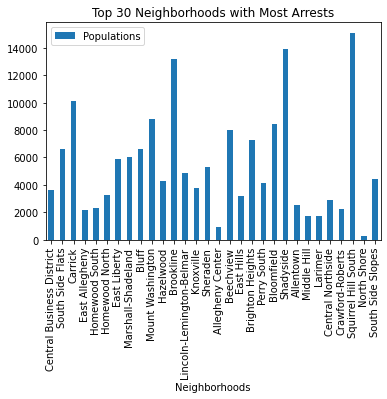

In [7]:
neighborhoodpop.iloc[:30].plot(kind = 'bar', x="Neighborhoods", y="Populations", title="Top 30 Neighborhoods with Most Arrests")

# As we can see, cities with lower population but higher total arrests would be worse to live at as this means their average crime rate per person is higher. This will be another metric we will use.
In this scenario, Central Business District has a very low population for its total crimes.
To further illustrate this, I will calculate the mean crimes per person by dividing the crimes by total people.

In [4]:
mean = {}
for index, row in arrest.iterrows():
    if row["INCIDENTNEIGHBORHOOD"] in mean:
        mean[row["INCIDENTNEIGHBORHOOD"]] = mean[row["INCIDENTNEIGHBORHOOD"]] + 1
    else:
        mean[row["INCIDENTNEIGHBORHOOD"]] = 1
mean_sorted =  sorted(mean, key=mean.get, reverse=True)
#matching index of name and population
for key in mean_sorted:
    word2 = key
    populations2 = 0
    indexOf2 = mean_sorted.index(word2)
    for index, row in arrest.iterrows():
        if word2 == row["INCIDENTNEIGHBORHOOD"]:
           populations2 = populations2 + 1
           mean_sorted[indexOf2] = populations2
print(mean_sorted)
#print(offending_sorted)

[4276, 3396, nan, 2311, 2161, 2057, 1936, 1858, 1499, 1466, 1416, 1368, 1349, 1328, 1306, 1261, 1229, 1171, 1164, 1096, 1041, 973, 956, 933, 921, 866, 832, 813, 808, 800, 792, 789, 754, 708, 706, 702, 657, 651, 587, 585, 550, 531, 512, 492, 489, 461, 449, 434, 428, 425, 365, 346, 321, 313, 309, 304, 302, 297, 295, 293, 288, 287, 281, 279, 265, 263, 222, 222, 220, 214, 198, 187, 187, 185, 171, 164, 162, 153, 127, 123, 123, 122, 118, 83, 80, 74, 64, 56, 54, 48, 46, 42, 39, 37, 36, 23, 18, 6, 2]


# Weapon Seizures

Now we can look at the data pertaining to weapon seizures.

In [17]:
#count the weapons seizures per neighborhood
seizure_counts = seizure['neighborhood'].value_counts()

#convert the population data into a dictionary
population_dict = pop.set_index('Neighborhood')['Population (2010)'].to_dict()

#calculate the seizures per person per neighborhood
seizures_per_person = seizure_counts.to_frame(name='SeizureCount')
seizures_per_person['Population'] = seizures_per_person.index.map(population_dict)
seizures_per_person['SeizuresPerPerson'] = seizures_per_person['SeizureCount'] / seizures_per_person['Population']

print(seizures_per_person)

                           SeizureCount  Population  SeizuresPerPerson
Homewood South                      252      2344.0           0.107509
South Side Flats                    180      6597.0           0.027285
Homewood North                      130      3280.0           0.039634
Carrick                             117     10113.0           0.011569
Central Business District           112      3629.0           0.030862
...                                 ...         ...                ...
Mt. Oliver                            4       509.0           0.007859
Chartiers City                        4       477.0           0.008386
Friendship                            3      1785.0           0.001681
Summer Hill                           2      1051.0           0.001903
Swisshelm Park                        1      1361.0           0.000735

[88 rows x 3 columns]


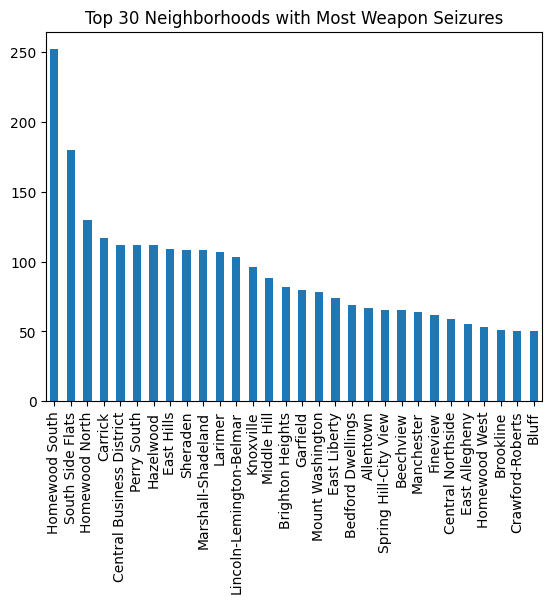

In [18]:
seizure_counts.iloc[:30].plot(kind='bar', x="Neighborhood", y="Weapon Seizures", title="Top 30 Neighborhoods with Most Weapon Seizures")



Here we can see that comparing the bar graohs between the two metrics, there may be some correlation but not strong enough to come to a conclusion on the "safest neighborhood"

# Safety Score

In order to determine the "best" neighborhood in the city of Pittsburgh, we will need to determine a metric that takes into account multiple factors as simply just looking at arrest numbers is not defining. We have decided to determine a "Safety Score" which takes into account population, weapon seizures, and arrest numbers. In order to calculate this metric, we will determine the number of arrests per person, and the number of weapon seizures per person for each neighborhood. We then will take the average of these two scores to determine the safety score. Due to the nature of the calculation a lower score is better, therefore the safety score will be subtracted from 1 so that it reads better (the higher the score the safer the neighborhood).

In [16]:
#pull the neighborhood and population data from the population dataset
neighborhood_data = pop[['Neighborhood', 'Population (2010)']]

#count how many times each neighborhood appears in the weapon seizure data
seizure_count = seizure['neighborhood'].value_counts()
seizure_count = seizure_count.reset_index()
seizure_count.columns = ['Neighborhood', 'Weapon Seizures']

#count how many times each neighborhood appears in the arrest data
arrest_count = arrest['INCIDENTNEIGHBORHOOD'].value_counts()
arrest_count = arrest_count.reset_index()
arrest_count.columns = ['Neighborhood', 'Arrests']

#combine the data starting with the arrest data
combined_data = pd.merge(neighborhood_data, arrest_count, on='Neighborhood', how='inner')

#add seizure data
final_data = pd.merge(combined_data, seizure_count, on='Neighborhood', how='inner')

#change the column name of the population column
final_data = final_data.rename(columns={'Population (2010)': 'Population'})

#add new columns for seizures per person and arrests per person
#this is calcualted by dividing the number of occurances by the population for each neighborhood
final_data['Seizures Per Person'] = final_data['Weapon Seizures'] / final_data['Population']
final_data['Arrests Per Person'] = final_data['Arrests'] / final_data['Population']

#compute the safetyscore
final_data['SafetyScore'] = 1 - ((final_data['Seizures Per Person'] + final_data['Arrests Per Person']) / 2)

#sort the data
final_data_sorted = final_data.sort_values(by='SafetyScore', ascending=False)

#print the dataFrame
print(final_data_sorted)


                 Neighborhood  Population  Arrests  Weapon Seizures  \
71        Squirrel Hill North       11363      287               10   
18          Central Northside        2923       23               59   
77             Swisshelm Park        1361       42                1   
52              North Oakland       10551      434               15   
62              Regent Square         928       36                4   
..                        ...         ...      ...              ...   
16  Central Business District        3629     4276              112   
0            Allegheny Center         933     1229               16   
53                North Shore         303      800               16   
66                South Shore          19      295               12   
21                    Chateau          11      449               22   

    Seizures Per Person  Arrests Per Person  SafetyScore  
71             0.000880            0.025257     0.986931  
18             0.020185      

In [15]:
safety_score = final_data_sorted[['Neighborhood', 'SafetyScore']]
print(safety_score)

                 Neighborhood  SafetyScore
71        Squirrel Hill North     0.986931
18          Central Northside     0.985973
77             Swisshelm Park     0.984203
52              North Oakland     0.978722
62              Regent Square     0.978448
..                        ...          ...
16  Central Business District     0.395426
0            Allegheny Center     0.332797
53                North Shore    -0.346535
66                South Shore    -7.078947
21                    Chateau   -20.409091

[86 rows x 2 columns]


# Conslusion

Here we can see that Squirrel Hill North would be considered the 'safest' by our own metric. We can also see that Chateau has the worst score and it is infact negative. Looking at the data, we can see that the population.csv dataset we were using has a population of 11 in Chateau with an arrest count of close to 500. With these data points in mind we can see that our calculations are correct but the data that was collected may not be entirely correct. 

Another thing to consider is the population data we have gathered is from 2010, so more than a decade old. These numbers are not accurate but if the data were updated to reflect todays metrics more acurately, we could produce an answer that would be more precise.